In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

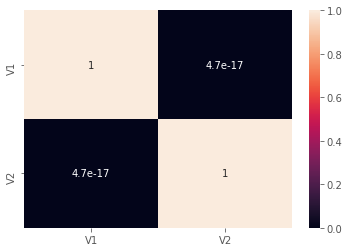

In [6]:
df_corr=df[['V1','V2']]
# df_v2=df['V2']
df_corr.corr()
sns.heatmap(df_corr.corr(), annot=True)

In [7]:
fraud=df[df['Class']==1]
fraud.shape

(492, 31)

In [8]:
real=df[df['Class']==0]
real.shape

(284315, 31)

In [9]:
a=df.groupby('Class',as_index=False)['Amount'].sum() #generally used for categorical variable
a

,Class,Amount
0,0,2.510246e+07
1,1,6.012797e+04


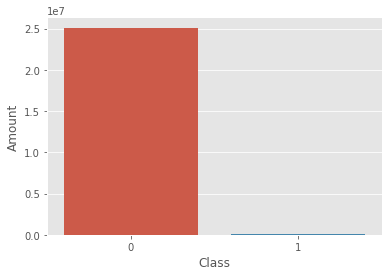

In [10]:
sns.barplot(x='Class',y='Amount',data=a)
plt.show()

In [11]:
a=df.groupby('Class',as_index=False)['Time'].sum() #generally used for categorical variable
a

,Class,Time
0,0,2.696392e+10
1,1,3.972743e+07


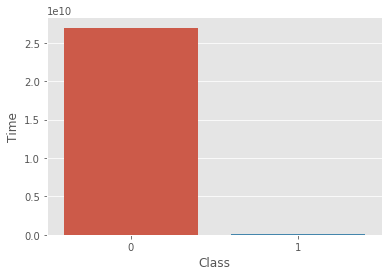

In [12]:
sns.barplot(x='Class',y='Time',data=a)
plt.show()

In [13]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
input_columns = [column for column in df.columns if column != 'Class']
output_column = 'Class'
print (input_columns)
print (output_column)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Class


In [15]:
#input data
X = df.loc[:,input_columns].values
#output data 
y = df.loc[:,output_column]
#shape of input and output dataset
print (X.shape, y.shape)

(284807, 30) (284807,)


In [16]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100)
#stratify is y meaning we will have equal proportion of both test and train data

In [18]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(199364, 30)
(199364,)
(85443, 30)
(85443,)


In [19]:
y_train.value_counts()

0    199014
1       350
Name: Class, dtype: int64

In [20]:
y_test.value_counts()

0    85301
1      142
Name: Class, dtype: int64

In [21]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

350
142


In [22]:
#fit the logisitc regression model on training dataset 
logreg = LogisticRegression().fit(X_train,y_train)

C:\Users\PRANAW MISHRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
# # logreg.classes_
logreg.intercept_
logreg.coef_

array([[-8.69285907e-05,  5.36914161e-01, -8.32895895e-01,
        -7.84810917e-01,  2.31530426e-01,  2.64801205e-01,
        -1.62023523e-01,  4.70141375e-01, -4.98244546e-01,
        -5.98523978e-01, -4.19347646e-01, -2.11165602e-01,
        -1.03037845e-01, -4.58294707e-01, -1.15399836e+00,
        -4.64565020e-01, -4.67731572e-01, -8.64015966e-01,
        -5.77114442e-02,  7.48329625e-02,  8.51624804e-02,
         3.22052052e-01,  3.82914729e-01,  1.02459949e-01,
        -4.09135533e-02, -3.96758770e-01,  6.17642783e-02,
        -6.29644326e-02,  1.04731243e-01, -7.52376823e-03]])

In [24]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
print(y_train_pred)
print(y_test_pred.sum())
print(y_test.sum())
print(138/148)

[0 0 0 ... 0 0 0]
144
142
0.9324324324324325


In [25]:
data=list(zip(y_test,y_test_pred))
comptab=pd.DataFrame(data,columns=['Actual','Predicted'])
comptab

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
85438,0,0
85439,0,0
85440,0,0
85441,0,0


In [26]:
# logreg.score(y_test_pred,y_test)
# print(y_test_pred/y_test)
# print(X_test)

In [27]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9990921129190827
0.9990168884519505


In [28]:
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.8597914719567468
0.8553817541891011


In [29]:
train_confusion = metrics.confusion_matrix(y_train, y_train_pred)
train_TP = train_confusion[1, 1]
train_TN = train_confusion[0, 0]
train_FP = train_confusion[0, 1]
train_FN = train_confusion[1, 0]

In [30]:
test_confusion = metrics.confusion_matrix(y_test, y_test_pred)
test_TP = test_confusion[1, 1]
test_TN = test_confusion[0, 0]
test_FP = test_confusion[0, 1]
test_FN = test_confusion[1, 0]

In [31]:
print(train_confusion)

[[198931     83]
 [    98    252]]


In [32]:
print(test_confusion)

[[85258    43]
 [   41   101]]


In [33]:
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred)

No handles with labels found to put in legend.


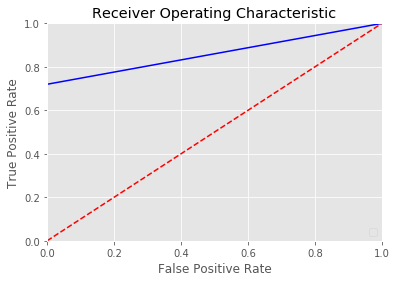

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred)

No handles with labels found to put in legend.


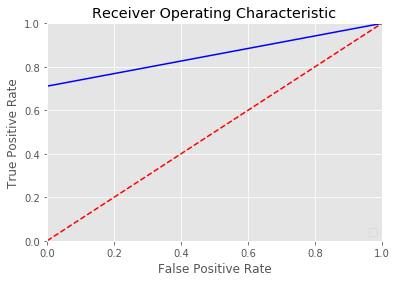

In [36]:
plt.title('Receiver Operating Characteristic')
plt.plot(test_fpr, test_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()